In [13]:
require 'charty'

Charty::Matplot.activate_iruby_integration
charty = Charty::Main.new(Charty::Matplot.new)

#<Charty::Main:0x00007fa5f7b30ae8 @frontend=#<Charty::Matplot:0x00007fa5f7b30b10 @plot=<module 'matplotlib.pyplot' from '/usr/local/opt/python@2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>>>

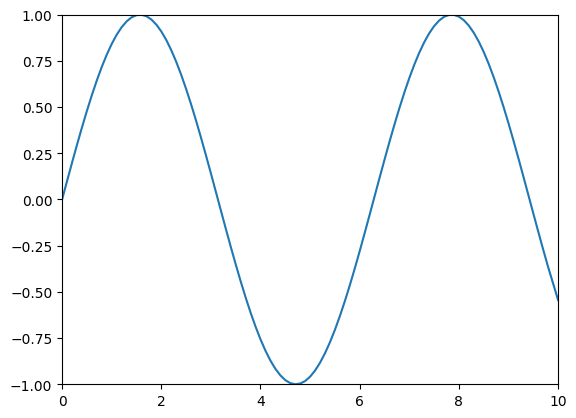

In [14]:
curve = charty.curve do
  function {|x| Math.sin(x) }
  range x: 0..10, y: -1..1
end
curve.render

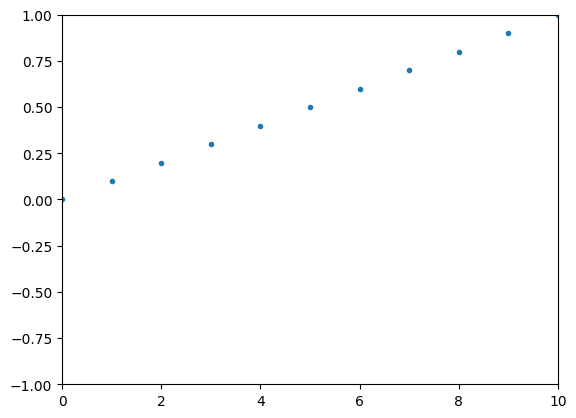

In [15]:
scatter = charty.scatter do
  series 0..10, (0..1).step(0.1)
  range x: 0..10, y: -1..1
end
scatter.render

In [16]:
layout = charty.layout

#<Charty::Layout:0x00007fa5f7b11be8 @frontend=#<Charty::Matplot:0x00007fa5f7b30b10 @plot=<module 'matplotlib.pyplot' from '/usr/local/opt/python@2/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>, @series=#<struct Charty::Series xs=0..10, ys=#<Enumerator: 0..1:step(0.1)>>>, @layout=#<Charty::ArrayLayout:0x00007fa5f7b11bc0 @array=[], @direction=:horizontal>>

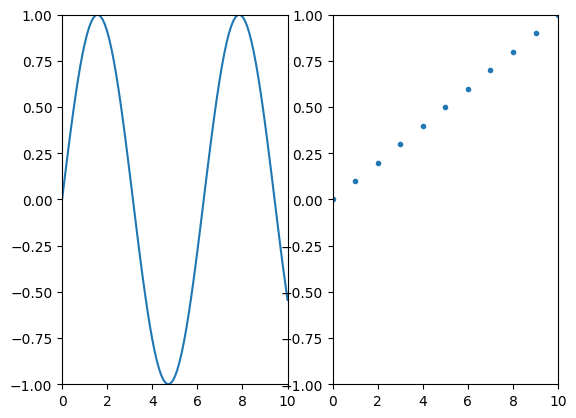

In [17]:
layout << curve
layout << scatter
layout.render

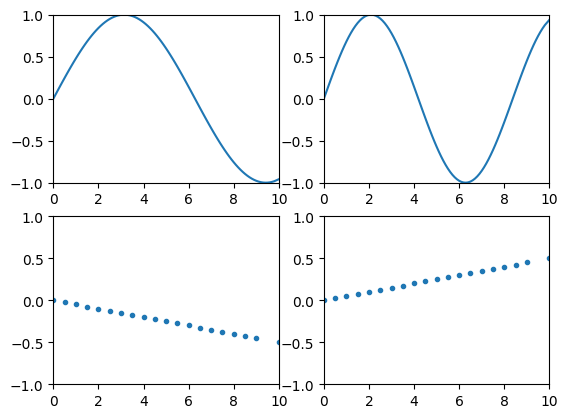

In [18]:
curve_list = [0.5, 0.75].map do |f|
  charty.curve(f:f) do
    function {|x| Math.sin(f*x) }
    range x: 0..10, y: -1..1
  end
end

scatter_list = [-0.5, 0.5].map do |f|
   charty.scatter(f: f) do
    series Charty::Linspace.new(0..10, 20), Charty::Linspace.new(0..f, 20)
    range x: 0..10, y: -1..1
  end
end

grid_layout = charty.layout(:grid2x2)
grid_layout << curve_list
grid_layout << scatter_list
grid_layout.render

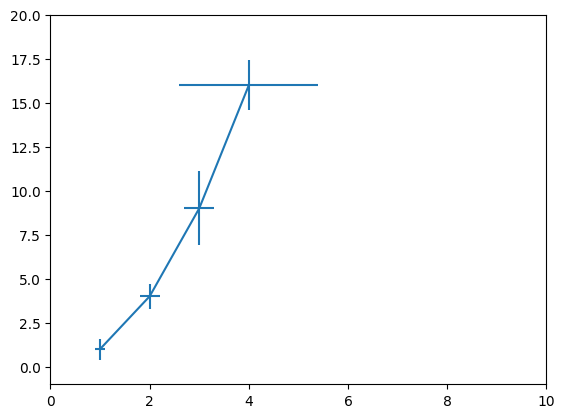

In [19]:
errorbar = charty.errorbar do
  series [1,2,3,4], [1,4,9,16]
  range x: 0..10, y: -1..20
  yerr [0.6,0.7,2.1,1.4]
  xerr [0.1,0.2,0.3,1.4]
end
errorbar.render